<a href="https://colab.research.google.com/github/p25-c4/kerly_project/blob/main/0317_js_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!rm ~/.cache/matplotlib -rf

Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [5]:
!pip install konlpy

In [1]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

In [17]:
mpl.rc("font", family = "NanumGothic")
mpl.rc("axes", unicode_minus=False)

In [18]:
df = pd.read_csv("/content/drive/MyDrive/PABA/data_file/on_items.csv")

In [19]:
df['ItemName'] = df['ItemName'].str.replace('[^가-힣]', ' ', regex = True)
df['ItemName']

0             식품 샘표 김치국수        입 가공식품 
1             식품 샘표 김치국수        입 가공식품 
2             식품 샘표 김치국수        입 가공식품 
3               배 메밀        희석용 소바 국수장국
4               배 메밀        희석용 소바 국수장국
                      ...              
11014                 한국 탄산음료 코카콜라     
11015                 한국 탄산음료 코카콜라     
11016     환타 오렌지           캔   탄산음료 음료수
11017     환타 오렌지           캔   탄산음료 음료수
11018     환타 오렌지           캔   탄산음료 음료수
Name: ItemName, Length: 11019, dtype: object

In [20]:
import konlpy
kkma = konlpy.tag.Kkma()

nouns = df['ItemName'].apply(kkma.nouns)
nouns

0        [식품, 샘표, 김치, 김치국수, 국수, 입, 가공, 가공식품]
1        [식품, 샘표, 김치, 김치국수, 국수, 입, 가공, 가공식품]
2        [식품, 샘표, 김치, 김치국수, 국수, 입, 가공, 가공식품]
3        [배, 메밀, 희석, 소, 소바, 바, 국수, 국수장국, 장국]
4        [배, 메밀, 희석, 소, 소바, 바, 국수, 국수장국, 장국]
                        ...                 
11014               [한국, 탄산, 탄산음료, 음료, 코카콜라]
11015               [한국, 탄산, 탄산음료, 음료, 코카콜라]
11016         [환, 오렌지, 캔, 탄산, 탄산음료, 음료, 음료수]
11017         [환, 오렌지, 캔, 탄산, 탄산음료, 음료, 음료수]
11018         [환, 오렌지, 캔, 탄산, 탄산음료, 음료, 음료수]
Name: ItemName, Length: 11019, dtype: object

In [21]:
nouns = nouns.explode()
nouns

0          식품
0          샘표
0          김치
0        김치국수
0          국수
         ... 
11018       캔
11018      탄산
11018    탄산음료
11018      음료
11018     음료수
Name: ItemName, Length: 86771, dtype: object

In [22]:
df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word

,word,count
0,식품,2.0
0,샘표,2.0
0,김치,2.0
0,김치국수,4.0
0,국수,2.0
...,...,...
11018,오렌지,3.0
11018,탄산,2.0
11018,탄산음료,4.0
11018,음료,2.0


In [23]:
df_word = df_word.groupby('word', as_index = False).count().sort_values('count', ascending = False)
df_word

,word,count
3416,오뚜기,719
4684,커피,508
434,국내산,505
754,냉동,442
581,김치,435
...,...,...
3690,은빛,1
999,대상종가집,1
994,대봉,1
987,대림선,1


In [15]:
df_word = df_word.iloc[:, :]
df_word.head(5)

,word,count
0,가게,1
3745,이종,1
3753,이쳐스올푸드,1
3752,이쳐스,1
3751,이천쌀,1


In [24]:
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

{'오뚜기': 719,
 '커피': 508,
 '국내산': 505,
 '냉동': 442,
 '김치': 435,
 '동원': 406,
 '사과': 383,
 '고구마': 362,
 '만두': 341,
 '세트': 328,
 '박스': 324,
 '통조림': 309,
 '토마토': 296,
 '치즈': 288,
 '고등어': 279,
 '딸기': 276,
 '내외': 274,
 '롯데': 272,
 '호박': 254,
 '국산': 247,
 '배송': 244,
 '선물': 240,
 '오징어': 231,
 '미역': 231,
 '과일': 225,
 '참치': 223,
 '볶음': 215,
 '베리': 197,
 '카레': 196,
 '황도': 189,
 '라면': 188,
 '방울': 187,
 '식품': 183,
 '직송': 182,
 '농심': 181,
 '완도': 179,
 '가정용': 179,
 '국수': 177,
 '음료': 171,
 '블루': 169,
 '산지': 165,
 '골드': 164,
 '슬라이스': 164,
 '고기': 162,
 '업소': 159,
 '멸치': 158,
 '마리': 157,
 '꽁치': 153,
 '선물세트': 153,
 '원두': 149,
 '개입': 149,
 '포장': 146,
 '믹스': 144,
 '원두커피': 144,
 '세척': 143,
 '간고등어': 142,
 '김밥': 140,
 '산지직송': 139,
 '재래': 138,
 '즉석': 138,
 '안동': 137,
 '소시지': 135,
 '유기농': 134,
 '제주': 133,
 '양반': 132,
 '키위': 132,
 '자연': 131,
 '생수': 130,
 '손질': 130,
 '땅콩': 129,
 '아몬드': 128,
 '낙지': 127,
 '식빵': 127,
 '냉장': 126,
 '광천': 126,
 '드레싱': 125,
 '부사': 121,
 '식탁': 121,
 '봉지': 121,
 '프리미엄': 121,
 '블루베리': 121,
 '

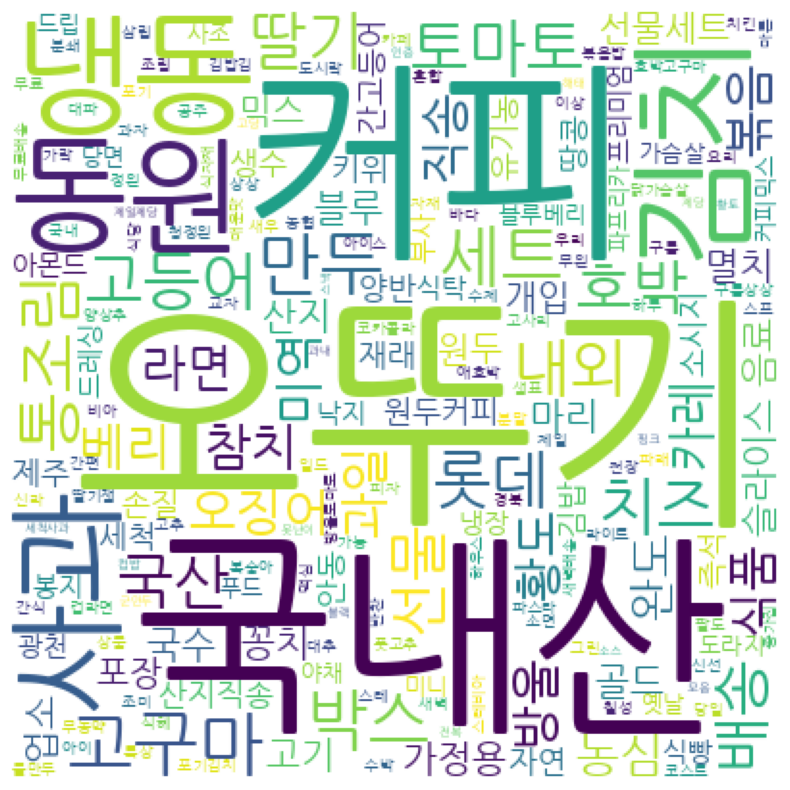

In [25]:
wc = WordCloud(random_state = 123, font_path = 'NanumGothic', width = 400,
               height = 400, background_color = 'white')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
plt.savefig('동감_워드클라우드') # 파일 저장